# Advanced cNN model

## @author: @ruhend(Himansh Mudigonda)

In [ ]:
!pip install tensorflow
!pip install numpy
!pip install matplotlib

### Imports

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import math
import os

print(tf.__version__)

2.7.0


### Data sets

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin = _URL, extract = True)

68616192/68606236 [==============================] - 1s 0us/step


In [3]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs


In [4]:
base_dir = os.path.join(os.path.dirname(zip_dir_base), 'datasets')
train_dir = os.path.join(os.path.dirname(base_dir), 'datasets','cats_and_dogs_filtered','train')
validation_dir = os.path.join(os.path.dirname(base_dir),  'datasets','cats_and_dogs_filtered','validation')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

print(train_dir, validation_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

/root/.keras/datasets/cats_and_dogs_filtered/train /root/.keras/datasets/cats_and_dogs_filtered/validation



##### Understanding our data

In [5]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val   = num_cats_val + num_dogs_val

In [6]:
print("Total training images:                   :  ", total_train)
print("Total validation images:                 :  ", total_val)


print("Total number of cats in training data    :  ", num_cats_tr)
print("Total number of dogs in training data    :  ", num_dogs_tr)

print("Total number of cats in validation data  :  ", num_cats_val)
print("Total number of cats in validation data  :  ", num_cats_val)

Total training images:                   :   2000
Total validation images:                 :   1000
Total number of cats in training data    :   1000
Total number of dogs in training data    :   1000
Total number of cats in validation data  :   500
Total number of cats in validation data  :   500


### Setting Model Params

In [7]:
BATCH_SIZE = 100
IMG_SHAPE  = 150 

### Data Preparation

In [8]:
train_image_gen = ImageDataGenerator(rescale = 1./255)
val_image_gen   = ImageDataGenerator(rescale = 1./255)

In [9]:
train_data_gen  = train_image_gen.flow_from_directory(
    batch_size  = BATCH_SIZE,
    directory   = train_dir,
    shuffle     = True,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    class_mode  = 'binary'
)

Found 2000 images belonging to 2 classes.


In [10]:
val_data_gen    = val_image_gen.flow_from_directory(
    batch_size  = BATCH_SIZE,
    directory   = validation_dir,
    shuffle     = False,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    class_mode  = 'binary'
)

Found 1000 images belonging to 2 classes.


### Visualizing Test Data

In [11]:
sample_training_images, _ = next(train_data_gen)

In [12]:
def plotImages(image_arr):
    fig, axes = plt.subplots(1, 5, figsize=(30,30))
    axes = axes.flatten()
    for img, ax in zip(image_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

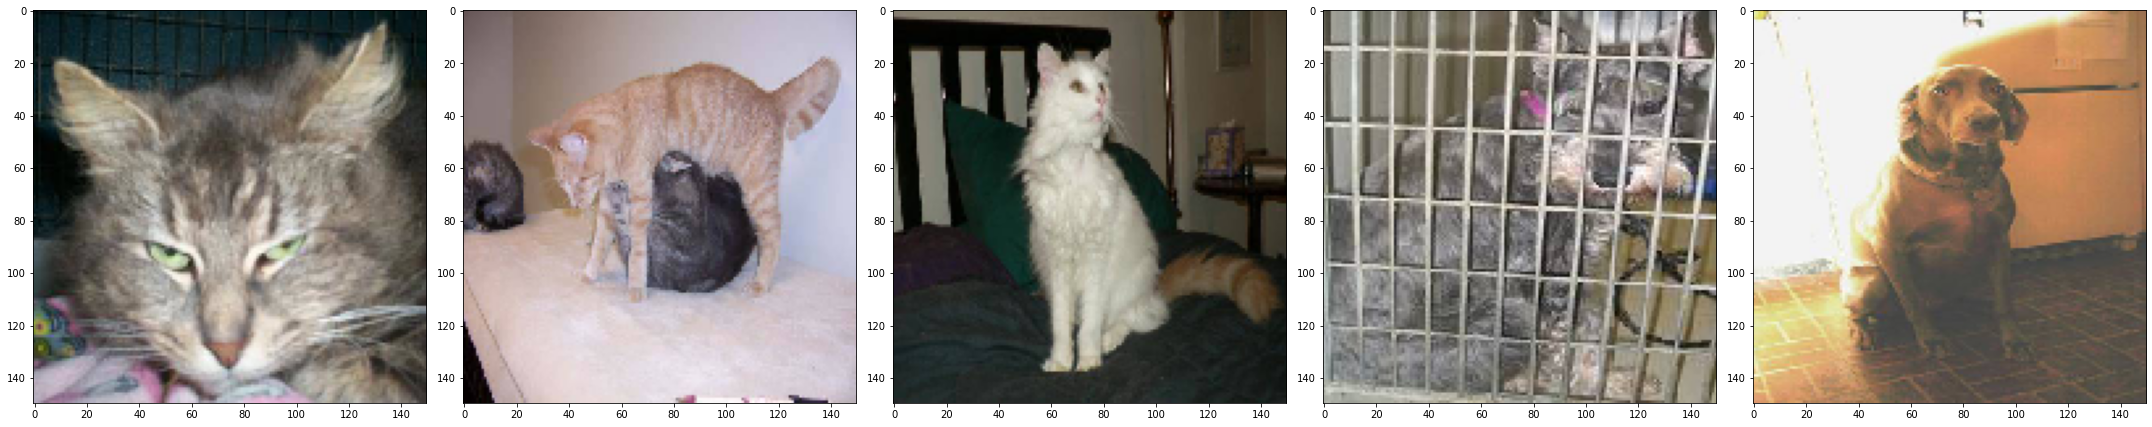

In [13]:
plotImages(sample_training_images[:5])

## Defining the Model

In [14]:
# This will have 4 Conv layers followed by 2 Dense
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,  (3, 3), activation = 'relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64,  (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax')
])

In [15]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

### Training the model

In [18]:
EPOCHS = 100
history = model.fit(
    train_data_gen,
    steps_per_epoch = total_train//BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = val_data_gen,
    validation_steps = total_val//BATCH_SIZE
) 

Epoch 1/100
20/20 [==============================] - 12s 633ms/step - loss: 0.6833 - accuracy: 0.5640 - val_loss: 0.6770 - val_accuracy: 0.5480
Epoch 2/100
20/20 [==============================] - 10s 489ms/step - loss: 0.6527 - accuracy: 0.6180 - val_loss: 0.6456 - val_accuracy: 0.6340
Epoch 3/100
20/20 [==============================] - 10s 491ms/step - loss: 0.5862 - accuracy: 0.6955 - val_loss: 0.6690 - val_accuracy: 0.6080
Epoch 4/100
20/20 [==============================] - 10s 492ms/step - loss: 0.5375 - accuracy: 0.7335 - val_loss: 0.6533 - val_accuracy: 0.6650
Epoch 5/100
20/20 [==============================] - 10s 497ms/step - loss: 0.4899 - accuracy: 0.7555 - val_loss: 0.6042 - val_accuracy: 0.6900
Epoch 6/100
20/20 [==============================] - 10s 493ms/step - loss: 0.4178 - accuracy: 0.8025 - val_loss: 0.6386 - val_accuracy: 0.6850
Epoch 7/100
20/20 [==============================] - 10s 493ms/step - loss: 0.3952 - accuracy: 0.8220 - val_loss: 0.7369 - val_accuracy:

### Visualizing the results of the training 

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epoch_range = range(EPOCHS)

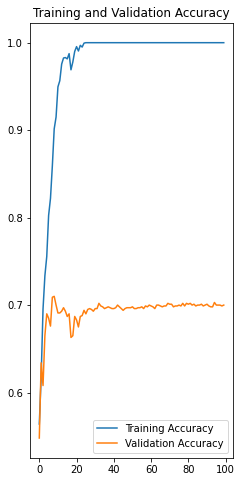

In [20]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, acc, label = 'Training Accuracy')
plt.plot(epoch_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')
plt.show()

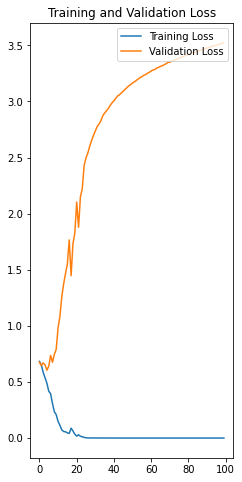

In [21]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, loss, label = 'Training Loss')
plt.plot(epoch_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()